# Importing Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import time

# Defining useful functions

In [7]:
def fknmu(L,n,mu):
    #Make sure not to pass neither n==0 nor mu==0
    knmu = 2*np.pi*n*mu/L
    b = np.sin(knmu)/knmu # Equation (28) of https://doi.org/10.1016/j.cnsns.2020.105512
    return b

def MB0(M,L,alf,bet): 
    
    m1 = fknmu(L,M,alf)
    m2 = 1+fknmu(L,M,bet)
    
    mb = m1/m2  # Equation (27) of https://doi.org/10.1016/j.cnsns.2020.105512
    
    return mb

def countour_MB0(ALPHA,BETA):
    #ALPHA, BETA: MATRIX
    
    res = MB0(2,1,ALPHA,BETA) #grid of values
    
    for j in range(len(res)):
        for k in range(len(res[0])):
            res[j][k] = 1
    
    for m in range(2,50):# Looping over the values of the number of peaks. 
                            # For large values of m, Eq. (28) (MB0) goes to zero. 
        ratio = MB0(m,1,ALPHA,BETA)
        for j in range(len(ratio)):
            for k in range(len(ratio[0])):
                if ratio[j][k] > 1 and ratio[j][k] > res[j][k]:

                    res[j][k] = ratio[j][k]
                    
    return res

# Making some calculations

In [19]:
%%time 
alf = np.linspace(0.001,0.1,1000) # Range for the growth length parameter alpha
bet = np.linspace(0.001,0.5,1000) # Range for the competition length parameter beta

#building a 2D array
betas, alfas = np.meshgrid(alf, bet)
Z = countour_MB0(betas,alfas)
Z.shape

CPU times: user 58.8 s, sys: 15.7 ms, total: 58.8 s
Wall time: 59.4 s


(1000, 1000)

# Plotting the Phase Diagram

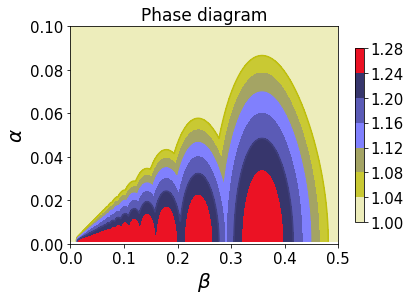

In [53]:
# Drawing Fig. 1. of https://doi.org/10.1016/j.cnsns.2020.105512
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


fig = plt.figure()
ax = fig.add_subplot(111)

xarray = alfas
yarray = betas


ax.contour(xarray,yarray,Z, 3, cmap=cm.gist_stern_r)
cpf = ax.contourf(xarray,yarray,Z, 7, cmap=cm.gist_stern_r)

ax.set_ylim(0,0.1)
ax.set_xlim(0,0.5)
ax.set_xlabel(r'$\beta$')   
ax.set_ylabel(r'$\alpha$')

ax.set_title('Phase diagram',size=17) 


CB = fig.colorbar(cpf, shrink=0.8, extend='both')
